In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pathlib
import random
import numpy as np
import matplotlib.image as mpimg 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} dir and {len(filenames)} images in '{dirpath}'.")

There are 2 dir and 0 images in '10_food_classes_all_data'.
There are 10 dir and 0 images in '10_food_classes_all_data\test'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 dir and 250 images in '10_food_classes_all_data\test\sushi'.
There are 10 dir and 0 images in '10_food_classes_all_data\train'.
There are 0 dir and 750 images in '10_f

In [9]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

data_dir  = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [11]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [105]:
def view_random_image(target_dir,target_class):
    target_folder = target_dir + "/" + target_class
    random_img = random.sample(os.listdir(target_folder), 1)
    print(random_img)
    img = mpimg.imread(target_folder + '/' + random_img[0])
    print(img.shape)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    return img

def plot_losses(history):
    epochs = range(len(history.history["loss"]))
    plt.plot(epochs,history.history["loss"],label = "loss")
    plt.plot(epochs,history.history["val_loss"],label = "val_loss")
    plt.legend()
    plt.figure()
    plt.plot(epochs,history.history["accuracy"],label = "accuracy")
    plt.plot(epochs,history.history["val_accuracy"],label = "val_accuracy")
    plt.legend()


['2062313.jpg']
(512, 512, 3)


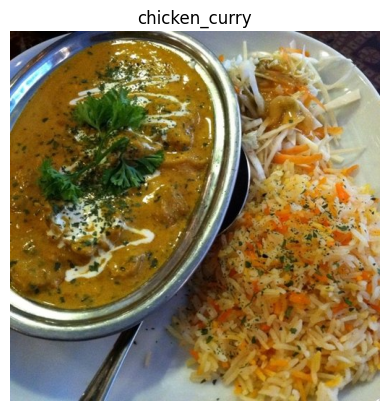

In [93]:
img = view_random_image(target_dir=train_dir,target_class = random.choice(class_names))

In [119]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32,class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir,target_size = (224,224),batch_size = 32,class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [120]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
tf.random.set_seed(42)
model = tf.keras.Sequential([
    Conv2D(10,3,input_shape = (224,224,3)),
    tf.keras.layers.Activation(activation = 'relu'),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])
hsitory = model.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 17s 71ms/step - loss: 2.1543 - accuracy: 0.2033 - val_loss: 2.0298 - val_accuracy: 0.2604
Epoch 2/5
235/235 [==============================] - 16s 69ms/step - loss: 1.9528 - accuracy: 0.3123 - val_loss: 1.9906 - val_accuracy: 0.2868
Epoch 3/5
235/235 [==============================] - 17s 72ms/step - loss: 1.6648 - accuracy: 0.4311 - val_loss: 2.0311 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 14s 61ms/step - loss: 1.1290 - accuracy: 0.6251 - val_loss: 2.4326 - val_accuracy: 0.2756
Epoch 5/5
235/235 [==============================] - 14s 60ms/step - loss: 0.4949 - accuracy: 0.8435 - val_loss: 3.3766 - val_accuracy: 0.2640


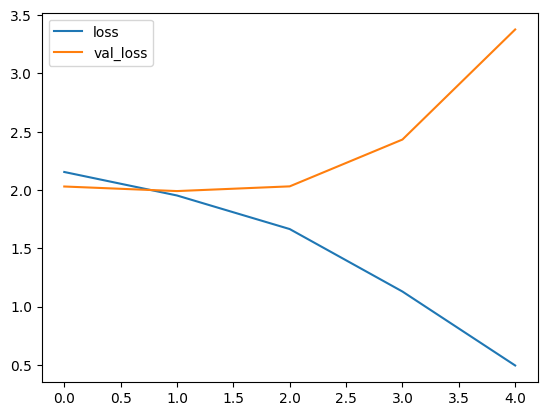

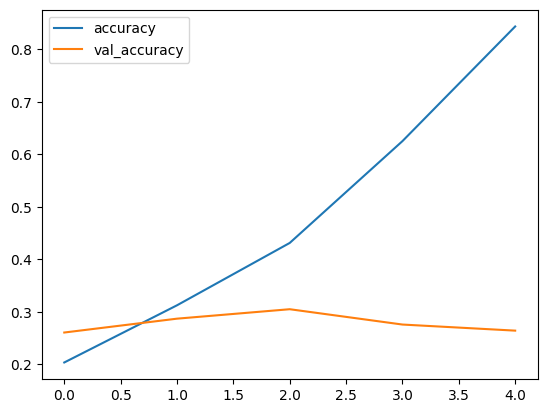

In [121]:
plot_losses(hsitory)

In [122]:
train_datagen_aug = ImageDataGenerator(rescale = 1./255.,rotation_range = 0.2,width_shift_range = 0.2,height_shift_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,target_size = (224,224),batch_size= 32,class_mode = "categorical")
len(train_data_aug)

Found 7500 images belonging to 10 classes.


235

In [123]:
tf.random.set_seed(42)
model_aug = tf.keras.Sequential([
    Conv2D(10,3,input_shape = (224,224,3)),
    tf.keras.layers.Activation(activation = 'relu'),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])
model_aug.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])
history_aug = model_aug.fit(train_data_aug,epochs = 5,steps_per_epoch=len(train_data_aug),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 218ms/step - loss: 2.2038 - accuracy: 0.1805 - val_loss: 2.0807 - val_accuracy: 0.2524
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 2.0637 - accuracy: 0.2655 - val_loss: 1.8831 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 52s 222ms/step - loss: 2.0000 - accuracy: 0.3012 - val_loss: 1.9448 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 1.9615 - accuracy: 0.3188 - val_loss: 1.9645 - val_accuracy: 0.3388
Epoch 5/5
235/235 [==============================] - 51s 219ms/step - loss: 1.9181 - accuracy: 0.3272 - val_loss: 1.8101 - val_accuracy: 0.3820


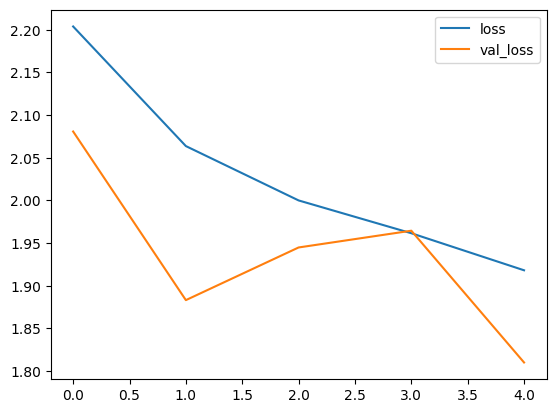

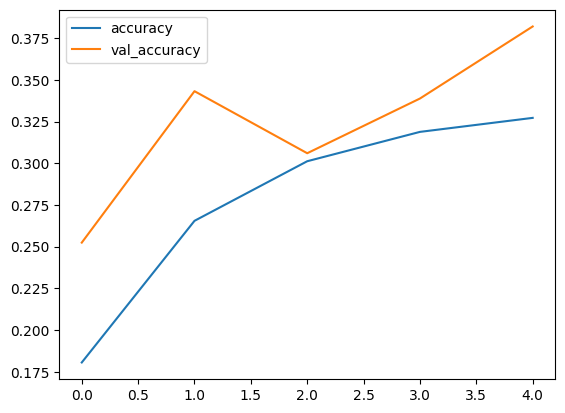

In [124]:
plot_losses(history_aug)

In [125]:
history_aug_2 = model_aug.fit(train_data_aug,epochs = 10,steps_per_epoch=len(train_data_aug),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 51s 215ms/step - loss: 1.8922 - accuracy: 0.3465 - val_loss: 1.7528 - val_accuracy: 0.3932
Epoch 2/10
235/235 [==============================] - 50s 214ms/step - loss: 1.8644 - accuracy: 0.3467 - val_loss: 1.6664 - val_accuracy: 0.4288
Epoch 3/10
235/235 [==============================] - 51s 216ms/step - loss: 1.8536 - accuracy: 0.3572 - val_loss: 1.8307 - val_accuracy: 0.3832
Epoch 4/10
235/235 [==============================] - 50s 214ms/step - loss: 1.8327 - accuracy: 0.3751 - val_loss: 1.6483 - val_accuracy: 0.4424
Epoch 5/10
235/235 [==============================] - 51s 216ms/step - loss: 1.7963 - accuracy: 0.3836 - val_loss: 1.6037 - val_accuracy: 0.4628
Epoch 6/10
235/235 [==============================] - 51s 215ms/step - loss: 1.7859 - accuracy: 0.3901 - val_loss: 1.6544 - val_accuracy: 0.4508
Epoch 7/10
235/235 [==============================] - 50s 215ms/step - loss: 1.7717 - accuracy: 0.3955 - val_loss: 1.7394 - val_ac

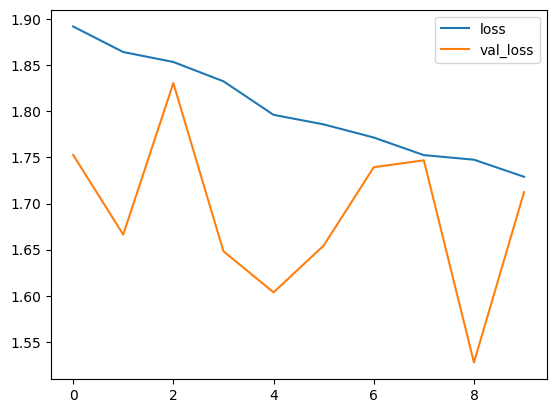

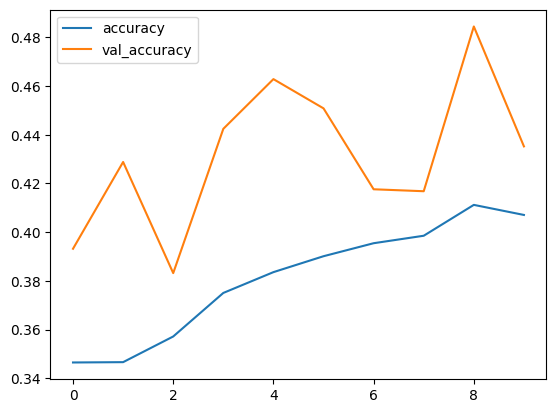

In [126]:
plot_losses(history_aug_2)